In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [2]:
df = pd.read_csv('../../data processing/reduced_dataset.csv')
pd.set_option("display.max_columns", None)

In [3]:
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,RainTomorrow
0,0.749989,1.230099,-2.093426,-0.298704,0.536319,0.481063,-1.064279,0.217299,-1.220448,-1.194645,1.970566,-0.312113,-0.065709,False
1,1.007009,-0.052832,-2.698468,-1.253686,0.384879,0.264372,-1.472700,-0.093843,-0.826070,-0.979376,1.495448,0.800856,0.987330,False
2,1.614931,1.042818,-1.918554,0.034041,-0.769160,0.998345,-1.182415,-0.221554,-1.643123,-0.345244,1.611492,-0.095412,0.692029,False
3,2.346759,-2.545315,0.220300,0.442592,0.807228,1.385255,-2.293140,0.289938,1.331965,1.334661,-0.895851,-0.577264,0.752065,False
4,1.170310,1.643348,-0.231587,-1.855438,-0.417431,2.028205,-1.078809,-0.647345,-0.709093,-0.462753,-0.012471,-0.994412,-1.481143,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.083345,-3.717788,0.178347,1.472794,1.058897,1.243298,0.465545,1.173320,-1.592043,0.183161,0.240572,0.156753,0.381497,False
145456,0.017594,-2.530976,-1.493767,-0.974144,0.510472,2.001109,0.665878,-0.344729,1.313493,-2.063659,-0.013646,-1.574120,-0.178437,False
145457,0.724006,-2.186203,-1.345398,-0.704922,0.761860,1.646034,0.585660,0.136316,0.549115,-1.498885,1.335171,-1.344210,-0.173701,False
145458,1.138285,-2.773773,-0.737175,-0.401409,1.367802,1.104264,0.423048,0.634580,-0.788424,-1.277074,-0.189990,-0.625883,-0.236861,False


In [4]:
X = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(145460, 13)

In [6]:
from tensorflow.keras import layers, models, optimizers, callbacks

# Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimum amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initializing the NN
model = models.Sequential()

model.add(layers.Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=13))
model.add(layers.Dense(units=32, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(units=16, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
opt = optimizers.Adam(learning_rate=0.00009)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size=32, epochs=150, callbacks=[early_stopping], validation_split=0.2)


Epoch 1/150


c:\python 3.9\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2910/2910 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7798 - loss: 0.5551 - val_accuracy: 0.7823 - val_loss: 0.4040
Epoch 2/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8062 - loss: 0.4190 - val_accuracy: 0.8322 - val_loss: 0.3980
Epoch 3/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8073 - loss: 0.4148 - val_accuracy: 0.8329 - val_loss: 0.3925
Epoch 4/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8067 - loss: 0.4134 - val_accuracy: 0.8335 - val_loss: 0.3901
Epoch 5/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8074 - loss: 0.4136 - val_accuracy: 0.8345 - val_loss: 0.3888
Epoch 6/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8093 - loss: 0.4097 - val_accuracy: 0.8351 - val_loss: 0.3880
Epoch 7/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8089 - loss: 0.4108 - val_accuracy: 0.8360 - val_loss: 0.3875
Epoch 8/150
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8076 - loss: 0.4101 - val_

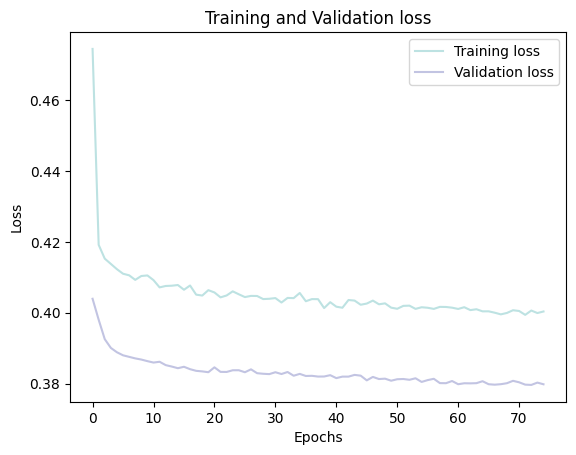

In [7]:
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

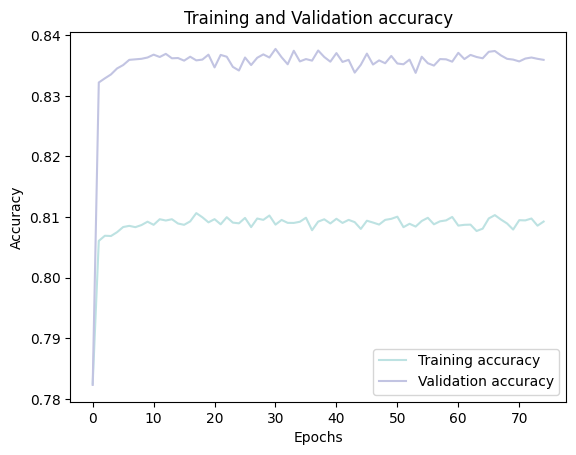

In [8]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))

910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step
              precision    recall  f1-score   support

       False       0.85      0.96      0.90     22672
        True       0.71      0.39      0.50      6420

    accuracy                           0.83     29092
   macro avg       0.78      0.67      0.70     29092
weighted avg       0.82      0.83      0.81     29092

